In [1]:
#pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
import numpy as np

In [2]:
df1 = pd.read_excel(r'C:\Users\15595\Documents\lab_work\Raman\Mauna_Loa\Kendra_samples\10_3_23\Raman_session_October 3, 2023_fitted_2023-10-03.xlsx')
df2 = pd.read_excel(r'C:\Users\15595\Documents\lab_work\Raman\Mauna_Loa\Kendra_samples\10_24_23\Raman_session_October 24, 2023_fitted_2023-10-27.xlsx')

In [3]:
com_data_oct=pd.concat([df1,df2],ignore_index=True)
com_data_oct.head()

,Unnamed: 0,filename,Name,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,...,sec since midnight,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,0,ML22_1_C_r1,ORI1_1_C,0.224433,0.007099,0.006695,0.002362,103.302725,0.016225,0.000883,...,31893,1150.740082,72.435632,47.696527,Spline,0.089529,31893,0.997664,0.997655,0.997672
1,1,ML22_1_A_r1,ORI1_1_A,0.195236,0.004849,0.004231,0.002368,103.231617,0.010355,0.000873,...,32802,1150.710585,44.113928,28.807904,Spline,0.041381,32802,0.997659,0.997651,0.997668
2,2,ML22_1_A,ORI1_1_A,0.176327,0.003412,0.002453,0.002372,103.185206,0.006039,0.000869,...,33143,1150.917066,60.469044,43.271924,Spline,0.027781,33143,0.997658,0.997650,0.997666
3,3,ML22_1_C,ORI1_1_C,0.219649,0.003986,0.003210,0.002363,103.291122,0.007792,0.000868,...,33405,1150.769579,122.643465,87.376384,Spline,0.086806,33405,0.997657,0.997648,0.997665
4,4,ML22_1_D_r1,ORI1_1_D,0.187774,0.003741,0.002895,0.002369,103.213334,0.007102,0.000857,...,34513,1150.946564,150.434555,79.597518,Spline,0.091915,34513,0.997652,0.997644,0.997661


In [4]:
len(com_data_oct['Name'])

36

In [5]:
#This saves the unfiltered 'com_data_oct' dataframe as an excel sheet 
excel_file = 'com_data_oct.xlsx'
com_data_oct.to_excel(excel_file)

In [6]:
#Filter to remove any samples with less than 3 accumulations
com_data_oct_filter=com_data_oct[com_data_oct['accumulations'] >= 3]

In [7]:
len(com_data_oct_filter['Name'])

28

In [8]:
com_data_oct_filter.head()

,Unnamed: 0,filename,Name,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,...,sec since midnight,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,0,ML22_1_C_r1,ORI1_1_C,0.224433,0.007099,0.006695,0.002362,103.302725,0.016225,0.000883,...,31893,1150.740082,72.435632,47.696527,Spline,0.089529,31893,0.997664,0.997655,0.997672
2,2,ML22_1_A,ORI1_1_A,0.176327,0.003412,0.002453,0.002372,103.185206,0.006039,0.000869,...,33143,1150.917066,60.469044,43.271924,Spline,0.027781,33143,0.997658,0.997650,0.997666
3,3,ML22_1_C,ORI1_1_C,0.219649,0.003986,0.003210,0.002363,103.291122,0.007792,0.000868,...,33405,1150.769579,122.643465,87.376384,Spline,0.086806,33405,0.997657,0.997648,0.997665
5,5,ML22_1_D,ORI1_1_D,0.204955,0.003072,0.001959,0.002366,103.255363,0.004779,0.000855,...,34833,1150.799077,72.789358,48.011210,Spline,0.096376,34833,0.997651,0.997643,0.997659
6,6,ML22_1_E,ORI1_1_E,0.209727,0.002773,0.001447,0.002365,103.266994,0.003525,0.000853,...,35112,NaN,NaN,NaN,NaN,NaN,35112,0.997650,0.997642,0.997658


In [9]:
#This saves filtered data with >3 accumulations as an excel sheet 'com_data_oct_filter'
excel_file = 'com_data_oct_filter.xlsx'
com_data_oct_filter.to_excel(excel_file)

In [10]:
# Group by 'Name' and calculate the average for all numeric columns within each group
numeric_columns = com_data_oct_filter.select_dtypes(include='number')
averages = com_data_oct_filter.groupby('Name')[numeric_columns.columns].mean().reset_index()
averages.head()

,Name,Unnamed: 0,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,...,Mag (X),sec since midnight,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,SO2_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,ORI1_15_B,1.0,0.094451,0.004407,0.002228,0.003802,102.988623,0.005623,0.000951,0.005555,...,100.0,28351.0,1151.182542,273.601488,174.533607,0.182229,28351.0,0.997724,0.997715,0.997733
1,ORI1_15_C,2.0,0.110375,0.004743,0.002819,0.003814,103.028812,0.007115,0.000939,0.007069,...,50.0,29489.0,1151.035056,171.188323,92.906710,0.379014,29489.0,0.997720,0.997711,0.997729
2,ORI1_1_A,2.0,0.176327,0.003412,0.002453,0.002372,103.185206,0.006039,0.000869,0.005990,...,50.0,33143.0,1150.917066,60.469044,43.271924,0.027781,33143.0,0.997658,0.997650,0.997666
3,ORI1_1_C,1.5,0.222041,0.005543,0.004952,0.002363,103.296923,0.012008,0.000875,0.012000,...,50.0,32649.0,1150.754831,97.539548,67.536455,0.088167,32649.0,0.997660,0.997652,0.997669
4,ORI1_1_D,5.0,0.204955,0.003072,0.001959,0.002366,103.255363,0.004779,0.000855,0.004713,...,50.0,34833.0,1150.799077,72.789358,48.011210,0.096376,34833.0,0.997651,0.997643,0.997659


In [11]:
len(averages['Name'])

22

In [12]:
#This splits the data in the "Name" column into three sections. It keeps the original data in the "Name" column, and the first
#second sections in column "Crystal". 
split_name = averages['Name'].str.split('_', n=2, expand=True)
averages.loc[:, 'Crystal'] = split_name[0] + '_' + split_name[1]

In [13]:
#This re-arranges columns to have the number of rows "Unnamed: 0", "Name", and "Crystal" 
averages = averages[['Unnamed: 0'] + [ 'Name', 'Crystal'] + [col for col in averages.columns if col not in ['Unnamed: 0', 'Name', 'Crystal']]]

In [14]:
averages.head()

,Unnamed: 0,Name,Crystal,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,...,Mag (X),sec since midnight,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,SO2_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,1.0,ORI1_15_B,ORI1_15,0.094451,0.004407,0.002228,0.003802,102.988623,0.005623,0.000951,...,100.0,28351.0,1151.182542,273.601488,174.533607,0.182229,28351.0,0.997724,0.997715,0.997733
1,2.0,ORI1_15_C,ORI1_15,0.110375,0.004743,0.002819,0.003814,103.028812,0.007115,0.000939,...,50.0,29489.0,1151.035056,171.188323,92.906710,0.379014,29489.0,0.997720,0.997711,0.997729
2,2.0,ORI1_1_A,ORI1_1,0.176327,0.003412,0.002453,0.002372,103.185206,0.006039,0.000869,...,50.0,33143.0,1150.917066,60.469044,43.271924,0.027781,33143.0,0.997658,0.997650,0.997666
3,1.5,ORI1_1_C,ORI1_1,0.222041,0.005543,0.004952,0.002363,103.296923,0.012008,0.000875,...,50.0,32649.0,1150.754831,97.539548,67.536455,0.088167,32649.0,0.997660,0.997652,0.997669
4,5.0,ORI1_1_D,ORI1_1,0.204955,0.003072,0.001959,0.002366,103.255363,0.004779,0.000855,...,50.0,34833.0,1150.799077,72.789358,48.011210,0.096376,34833.0,0.997651,0.997643,0.997659


In [15]:
#This taps into the data frame "averages" and pulls out unique data from the "Crystal" column. 
df = averages
df['Crystal'].unique()

array(['ORI1_15', 'ORI1_1', 'ORI1_4', 'ORI1_5', 'ORI1_7', 'ORI1_9',
       'ORI2_11', 'ORI2_2', 'ORI3_19'], dtype=object)

In [16]:
#standard deviation calculation
stds = com_data_oct_filter.groupby('Name')[numeric_columns.columns].std().reset_index()
stds.head()

,Name,Unnamed: 0,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,...,Mag (X),sec since midnight,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,SO2_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,ORI1_15_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ORI1_15_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ORI1_1_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ORI1_1_C,2.12132,0.003383,0.002201,0.002464,6.140558e-07,0.008205,0.005963,0.000011,0.005994,...,0.0,1069.145453,0.020858,35.502299,28.057896,0.001925,1069.145453,0.000005,0.000005,0.000005
4,ORI1_1_D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
excel_file = 'stds.xlsx'
stds.to_excel(excel_file)

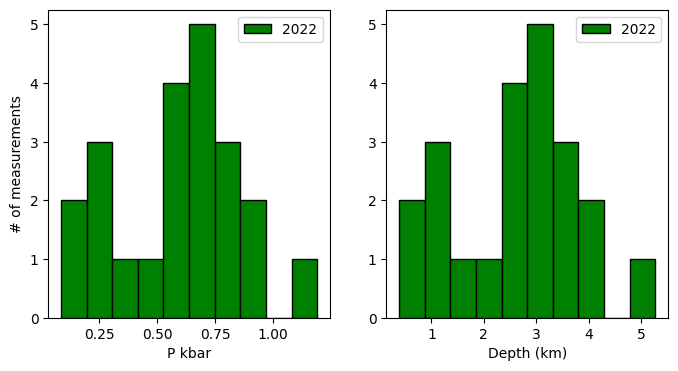

In [18]:
# Calculate pressure with a temperature estimate
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=1150+273.15,
                CO2_dens_gcm3=averages['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], crust_dens_kgm3=2300, g=9.81, d1=None, d2=None, rho1=None, rho2=None, rho3=None, model=None)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='green', label='2022')
ax2.hist(Depth, ec='k', fc='green', label='2022')
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of measurements')
#ax1.set_xlim([0, 1.5])
#ax2.set_xlim([0, 7])

ax1.legend()
ax2.legend()

In [19]:
len(averages['Name'])

22

In [20]:
#Guide to running code with specific factors
#Remove the "#" from below here to run code
#from DiadFit import convert_pressure_to_depth
#help(convert_pressure_to_depth)

In [21]:
excel_file = 'averaged_data.xlsx'
averages.to_excel(excel_file)